Title: Hello, World! What Languages to Learn in 2019? (Altair visualizations)
Date: 2019-04-01 22:35
Tags: python languages altair visualization
Slug: languages

It's been three weeks into my Data Science immersive bootcamp and I'm having a blast coding again! I'm starting to get used to Python and new libraries (pandas, altair, etc.). If you're like me and you've previously programmed in other languages like C/Java, when learning any new language, there was some unlearning and relearning to do. In particular, I found myself consistently trying to reach for a for-from-until-increment-loop in Python, which doesn't exist!

While I'm getting the hang of Python, I'm starting to appreciate the ease of use, code readability, and structure of the language. This brought me to something I was curious about... What are the top programming languages today? Am I learning the "right" language? How about spoken languages? What will strengthen my portfolio?

Like anything else, what do you do when questions arise? I googled it! This is not meant to tell you what languages to pick up or to drop but mainly to fulfill my curiosity. *No extensive research was done during this sitting*. I did take some basic data though and played around with Altair visualizations... so read on if you'd like to learn some tips and tricks for visualization.

[(Interactive) Multi-series Line Chart - with color and chart size modification](#multi_series_line_chart)

[(Interactive) Horizontal Stacked Bar Chart - with tooltip, selection, and filtering](#stacked_bar_chart)

## Programming Languages

***

How many programming languages exist? There doesn't seem to be a definite answer amongst different sources I looked at... let's just say a lot (maybe somewhere between 500 and 2000). There are two existing indexes that I found tracking programming language popularity.

1. [TIOBE Index](https://www.tiobe.com/tiobe-index/) - based on number of search engine results for queries containing the name of the language
2. [PYPL - PopularitY of Programming Language](http://pypl.github.io/PYPL.html) - based on how often language tutorials are searched on Google

I tried using Google Trends myself, on programming languages that I've learned and used in the past. *Retrieved 01-Apr-2019.*

### Retrieve Data
At [Google Trends](https://trends.google.com/trends/?geo=US), I searched the following 5 different languages for comparison worldwide from 2004 to now, and downloaded the data for interest over time. 

<img src="images/google_trends.png" alt="google_trends" width="900">

#### Import libraries and data

In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
# header that I want is on row 2
interest_over_time = pd.read_csv('interest_over_time.csv', header = 1)

Google trends does not return absolute search counts. Instead, it gives a number to compare popularity between search terms. I'm referring to this as `relative_popularity`. This is achieved by the number of searches (for any search term) divided by the total number of searches on Google, for the chosen geography and time range, then scaled (0 to 100) based on the all search terms. For example, Java (with 100 in 2004-03) was the most popular between all five languages worldwide from 2004-present. All other values can be treated relative to that. 

In [3]:
interest_over_time.head() # peek into data

,Month,Python: (Worldwide),Java: (Worldwide),C: (Worldwide),MATLAB: (Worldwide),Assembly language: (Worldwide)
0,2004-01,6,93,19,6,3
1,2004-02,7,98,21,8,3
2,2004-03,7,100,20,8,3
3,2004-04,6,97,20,8,3
4,2004-05,6,93,19,7,3


### Visualize with Altair
[Altair](https://altair-viz.github.io/) is a visualization library for Python, based on Vega and Vega-Lite. First, I used `pd.melt()` to unpivot the data from wide to long format.

In [4]:
long = pd.melt(interest_over_time, id_vars = ['Month'], 
               var_name = 'language', value_name = 'relative_popularity')

In [5]:
long.head() # peek into data

,Month,language,relative_popularity
0,2004-01,Python: (Worldwide),6
1,2004-02,Python: (Worldwide),7
2,2004-03,Python: (Worldwide),7
3,2004-04,Python: (Worldwide),6
4,2004-05,Python: (Worldwide),6


Here's some simple Altair code to generate a multi-series line chart:

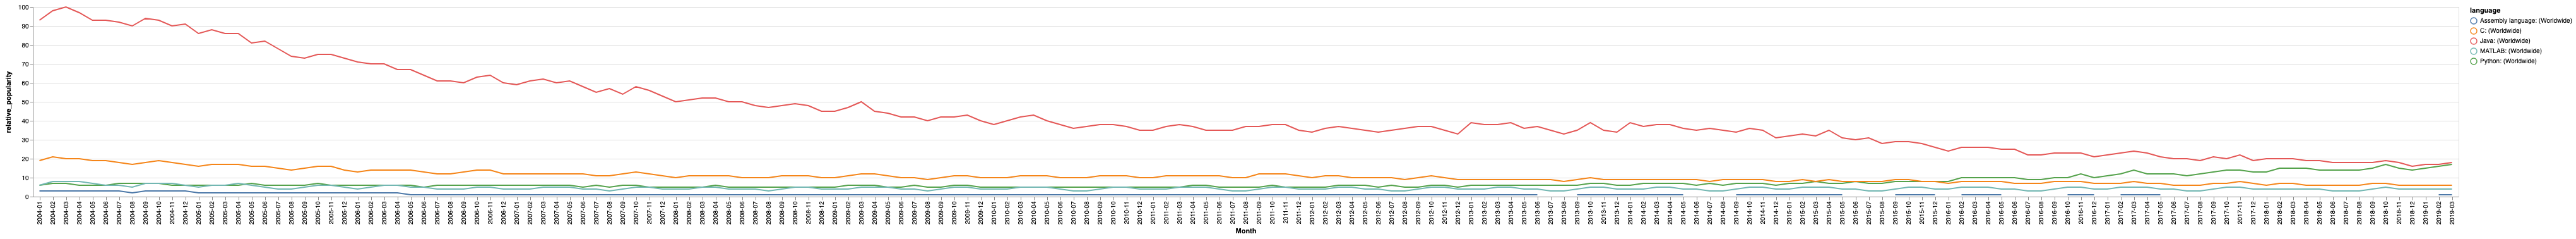

In [6]:
alt.Chart(long).mark_line().encode(
    x = 'Month',
    y = 'relative_popularity',
    color = 'language' # separate line for each language
)

<a id='multi_series_line_chart'></a>
#### Tips and Tricks (make it easier to see!)
That's a bit hard to see on one page... we can play around with the following:

- **Date format on x-axis:** Change the data type of column `Month` to `datetime64[ns]` using `pd.to_datetime()` to reduce the noise on the x-axis.

In [7]:
long['Month'] = pd.to_datetime(long['Month'])

- **Color:** Change the color scheme using `alt.Color` and `alt.Scale` if you think the blue, teal, green blends together in the chart above. Would you consider teal more green or blue? Other Vega color schemes can be found [here](https://vega.github.io/vega/docs/schemes/#reference).
- **Size:** Modify the chart size with `properties`.
- **Scaling:** Make chart axes scales `interactive` if you want to zoom into the bottom right noisier area.

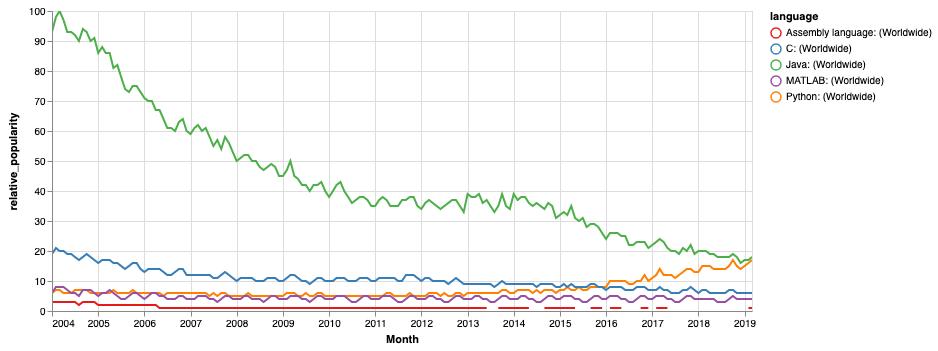

In [8]:
alt.Chart(long).mark_line().encode(
    x = 'Month',
    y = 'relative_popularity',
    color = alt.Color('language', 
                      scale = alt.Scale(scheme = 'set1')
                     )
).properties(
    width = 700, 
    height = 300
).interactive()

## Spoken Languages

***

On the other hand, there are **7,111 living spoken languages** that we know of to date according to [Ethnologue 2019, 22nd edition](https://www.ethnologue.com/)! I am supposedly trilingual but admittedly don't keep up the practice! I always wonder if I should be keeping up with these spoken languages... Spoken (or programming) languages are constantly evolving and their popularity shaped by the people and technolgies around the world.

I manually extracted the top 5 languages based on the number of `l1_speakers` (first language), `l2_speakers` (second language), and `total` number of speakers to play around with some more visualizations. 

Source: [Summary by language size](https://www.ethnologue.com/statistics/size), Ethnologue. *Retrieved 01-Apr-2019.*

### Retrieve Data

In [9]:
spoken = pd.read_csv('spoken_language_popularity.csv')

In [10]:
spoken # peak into data

,language,l1_speakers,l2_speakers,total
0,English,"379,007,140","753,359,540","1,132,366,680"
1,Mandarin Chinese,"917,868,640","198,728,000","1,116,596,640"
2,Hindi,"341,208,640","274,266,900","615,475,540"
3,Spanish,"460,093,030","74,242,700","534,335,730"
4,French,"77,177,210","202,644,720","279,821,930"


In [11]:
spoken.dtypes # check for column data types

language       object
l1_speakers    object
l2_speakers    object
total          object
dtype: object

Since all column data types are `object`, numeric columns were converted to `float64` (units, in millions) by:

- **Removing commas**: in the numeric `str` values by using `str.replace()`
- **Converting dtype** `object` to `float` using `astype()`
- **Unit conversion:** Dividing by 1,000,000 to convert to units (in millions), and flooring the number by dividing by 1

In [12]:
cols = ['l1_speakers', 'l2_speakers', 'total']
for col in cols:
    spoken[col] = spoken[col].map(lambda x: str(x).replace(',','')).astype(float) / 1_000_000 // 1

In [13]:
spoken

,language,l1_speakers,l2_speakers,total
0,English,379.0,753.0,1132.0
1,Mandarin Chinese,917.0,198.0,1116.0
2,Hindi,341.0,274.0,615.0
3,Spanish,460.0,74.0,534.0
4,French,77.0,202.0,279.0


### Visualize with Altair

Here I converted the data to a long format as was done for the Programming languages. A separate data frame is also created to keep hold of the `total` values. 

In [14]:
l1_l2 = pd.melt(spoken, id_vars = ['language'], value_vars = ['l1_speakers', 'l2_speakers'])
total = spoken[['language', 'total']]

Here's some simple Altair code to generate a horizontal bar chart:

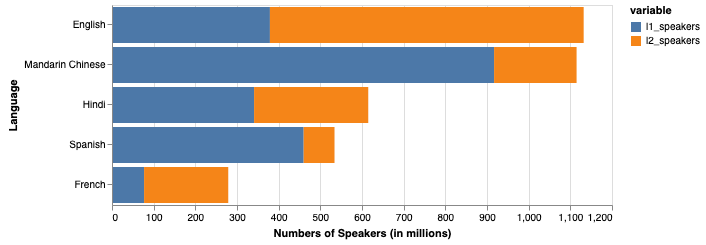

In [15]:
alt.Chart(l1_l2).mark_bar().encode(
    x = alt.X('sum(value)',
              axis = alt.Axis(title = 'Numbers of Speakers (in millions)'),
             ),
    y = alt.Y('language',
              axis = alt.Axis(title = 'Language'),
              sort = alt.EncodingSortField(op = 'count') # sort languages by total 
             ),
    color = 'variable',
    order = alt.Order('variable', sort = 'ascending') # put l1_speakers left of l2_speakers
).properties(
    width = 500,
    height = 200
)

<a id='stacked_bar_chart'></a>
#### Tips and Tricks (make it more interactive!) 
There are a couple of things we may want to do to try to make it more fun:

- **Selection:** Add a selection, which captures interactions from mouse clicks.

In [16]:
selection = alt.selection_single(fields = ['variable'])

- **Legend:** Create a separate legend out of `mark_point()` and using it as radio buttons to act as inputs to `selection`.

In [17]:
legend = alt.Chart(l1_l2).mark_point().encode(
    y = alt.Y('variable:N',
              axis = alt.Axis(title = None, orient = 'right')
             ),
    color = alt.Color('variable', legend = None)
).add_selection(
    selection
)

- **Filter:** Add `transform_filter` to the bar chart code, to transform the data based on `selection`
- **Tooltip:** Add `tooltip` to display details upon mouseover on different bars

In [18]:
l1_l2_bar = alt.Chart(l1_l2).mark_bar().encode(
    x = alt.X('sum(value)',
              axis = alt.Axis(title = 'Numbers of Speakers (in millions)')
             ),
    y = alt.Y('language',
              axis = alt.Axis(title = 'Language'),
              sort = alt.EncodingSortField(op = 'count')
             ),
    color = alt.Color('variable', legend = None),
    order = alt.Order('variable', sort = 'ascending'), 
    tooltip = ['language','variable', 'value']
).transform_filter(
    selection
).properties(
    width = 500,
    height = 200
)

- **Bar Background:** Add a background bar chart, to capture the `total` number of speakers and using `alt.layer()` *(`+` can also be used)* and `alt.hconcat()` *(`|` can also be used)* to combine charts together.

In [19]:
# background bars for total number of speakers
total_bar = alt.Chart(total).mark_bar(color = 'lightgray').encode(
    x = alt.X('total',
              axis = alt.Axis(title = 'Numbers of Speakers (in millions)'),
             ),
    y = alt.Y('language',
              axis = alt.Axis(title = 'Language'),
              sort = alt.EncodingSortField(op = 'count')
             ),
    tooltip = ['language','total']
).properties(
    width = 500,
    height = 200
)

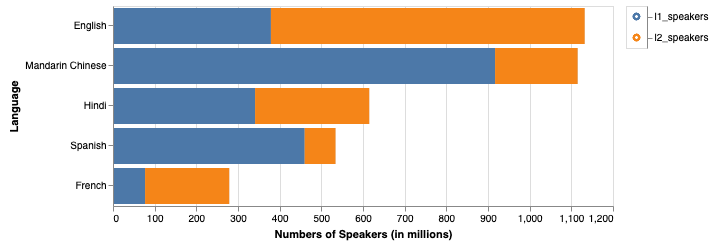

In [20]:
# compound charts 
total_bar + l1_l2_bar | legend 

You can try clicking the radio buttons on the legend and see how the chart changes! I'm still fairly new to Altair and all, so if there are better ways of doing what I tried, I'm open to feedback! Altair is also relatively new and consistently being updated so I'm sure that soon enough, there may be more concise ways of achieving the same charts.

**So... any thoughts on new languages to learn this year?**